# HMMA238 - TP noté : Jeu de la vie

*Cassandre LEPERCQUE* - 13 mars 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
import utils

**Question 1 :** Nous allons créer la chaîne de caractères `filename` correspondant au nom de notre fichier, de la forme suivante. 

In [3]:
filename = "HMMA238_TP_cassandrelepercque.ipynb"

**Question 2 :** Nous devons créer une variable `taille_str` qui compte le nombre de caractères dans la chaîne que nous venons de créer. 

In [4]:
taille_str = len(filename)
print("La taille de la chaine vaut :", taille_str)

La taille de la chaine vaut : 35


**Question 3 :** Nous devons créer une variable `ma_graine` qui vaut le reste de la division euclidienne de `taille_str` par 6. 

In [5]:
ma_graine = taille_str % 6
print("Le reste de la division euclidienne de notre chaine vaut :", ma_graine)

Le reste de la division euclidienne de notre chaine vaut : 5


### Implémentation sans `numpy`

   Nous allons dans cette partie, coder les cellules vivantes par des 1 et les cellules mortes par des 0.


**Question 4 :** Nous allons appliquer la fonction précédente à la liste *Z* (ci-après), et expliquer ce que représente la sortie obtenue `N=calcul_nb_voisins(Z)` (voir *utils*).

La fonction `calcul_nb_voisins` calcule le nombre de voisins de chaque case du jeu de la vie. 

In [6]:
#Liste Z :
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

def calcul_nb_voisins(Z): # calcul le nombre de voisins des cases d'un tableau
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y]  + 0       +Z[x+1][y]  \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N    
# N[x][y] compte le nombre de 1 autour de la case [x,y]
# forme : longueur du tableau initial Z et celle du premier sous-tableau de Z -> Z[0]


Nombre_voisins = calcul_nb_voisins(Z)
print(Nombre_voisins)


[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


Nous obtenons, à partir d'une liste donnée, une nouvelle liste qui contient le nombre de voisins pour les différentes cases du jeu de la vie.



Nous définissons à présent la fonction `iteration_jeu` (voir *utils*) et nous y rajoutons une *docstring* qui décrit les entrées / sorties et ce que retourne la fonction.

Cette fonction `iteration_jeu` nous dit si la case est vivante ou morte, en effet elle met soit un 0 soit un 1 dans chaque case. 

In [7]:
def iteration_jeu(Z): #dit si une case est vivante ou morte
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1, forme[0]-1):
        for y in range(1, forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z
# if : règle d'etouffement et d'isolement
#elif : règle de naissance
# règle équilibre est automatique

print(iteration_jeu(Z))

[[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


**Question 5 :** Nous allons afficher les étapes du jeu sur 10 itérations, en utilisant une boucle `for`. Nous utliserons la fonction `subplot` de `matplotlib` pour afficher sur 2 lignes et 5 colonnes ces 10 matrices. 

Nous allons ensuite transformer ces listes en *array* pour pouvoir utiliser la fonction `imshow` de `matplotlib`. 

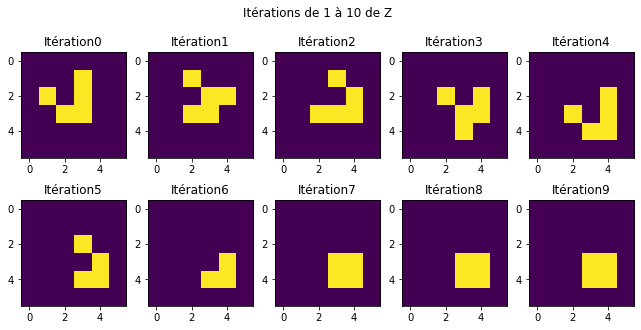

In [8]:
Z = [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]]

utils.afficher_iterations(iteration_jeu, Z)

**Question 6 :** Nous remarquons qu'entre l'itération 1 et 5, le jeu de la vie avance selon les règles dites, en effet nous remarquons des naissances et des morts de cellules. 